### Neural Network

Neural Network는 Layer가 두 개 이상인 모형을 의미한다. Layer가 심층적으로 쌓인 경우, Deep Neural Network라고 한다

<center>

![nn.png](Images/neural.png)

</center>

Neural Network에서는 계수(Coefficient)보다는 가중치(Weights)로 더 많이 통용된다. 추정하는 가중치 parameter는 결국 선형모형에서 Coefficient를 추정하는것과 같다.

**활성화 함수(Activation Function)** 는 통계학에서의 연결 함수의 개념을 차용한 것이다. 

대표적인 연결 함수로는 log, sigmoid, logistic이 존재하는데, 이중 sigmoid와 logistic은 초창기 Neural Network model의 활성화 함수로 사용된 것이다

한편, sklearn library에서는 `neural_network.MLPClassifier`, `neural_network.MLPRegressor`를 이용해 Neural Network를 구현할 수 있다

```
sklearn.neural_network.MLPClassifier()
```

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

X, y = datasets.fetch_openml('boston', return_X_y=True)
X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1. Input Layers

입력층에서는 데이터의 특성들이 입력된다. 입력 벡터 $\mathbf{x} = [x_1, x_2, ..., x_n]$는 특성 공간에서의 값들을 나타낸다. 입력값 $x_i$는 첫 번째 은닉층으로 전달된다.

$$\mathbf{x} = [x_1, x_2, ..., x_n]$$

#### 2. Hidden Layer

은닉층은 입력값에 가중치(weight)를 곱하고, 그 결과에 **편향(bias)** 을 더한 후 **활성화 함수(activation function)** 를 적용하여 비선형성을 도입한다.

입력 벡터 $\mathbf{x}$가 은닉층으로 전달되며, 가중치 행렬 $\mathbf{W}^{(1)}$와 곱해진다. 이 때, $\mathbf{W}^{(1)}$는 입력층에서 은닉층으로의 가중치 행렬이다. 각 은닉층 노드 $h_j$에서의 계산은 다음과 같다.

$$h_j = f\left( \sum_{i=1}^{n} W_{ji}^{(1)} x_i + b_j^{(1)} \right)$$

여기서 $W_{ji}^{(1)}$는 입력 $x_i$에서 은닉층 뉴런 $h_j$로 가는 가중치, $b_j^{(1)}$는 은닉층 뉴런 $h_j$의 bias(y intercept)이며, $f$는 비선형 활성화 함수(ex. sigmoid, ReLU 등)이다. 통계학에서 활성화함수는 대개 연결 함수를 의미한다. 따라서 은닉층의 출력 벡터 $\mathbf{h}^{(1)}$는 다음과 같다.

$$\mathbf{h}^{(1)} = f\left( \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)} \right)$$

여기서 $\mathbf{W}^{(1)}$는 은닉층의 가중치 행렬, $\mathbf{b}^{(1)}$는 은닉층의 편향 벡터이다.

In [2]:
hidden_nodes = 5
hidden_outputs_train = np.zeros((X_train.shape[0], hidden_nodes)) 
hidden_outputs_test = np.zeros((X_test.shape[0], hidden_nodes)) 

In [3]:
for i in range(hidden_nodes):
    random_weights = np.random.randn(X_train.shape[1]) # randomized weights
    X_train_mod = X_train * random_weights # train data
    X_test_mod = X_test * random_weights # test data

    ols_hidden = sm.OLS( # ols fitting
        y_train,
        sm.add_constant(X_train_mod)
    ).fit()

    hidden_outputs_train[:, i] = ols_hidden.predict(sm.add_constant(X_train_mod)) # predict value to hidden layer
    hidden_outputs_test[:, i] = ols_hidden.predict(sm.add_constant(X_test_mod))

### 3. Output Layer

출력층도 은닉층과 동일하게 가중치와 편향을 사용하여 계산된다. 은닉층에서 계산된 값들을 출력층으로 전달하여 최종 예측을 생성한다.

은닉층의 출력값 $\mathbf{h}^{(1)}$는 출력층으로 전달된다. 출력층에서 각 출력 노드 $y_k$에 대한 계산은 다음과 같다

$$y_k = f\left( \sum_{j=1}^{m} W_{kj}^{(2)} h_j^{(1)} + b_k^{(2)} \right)$$

여기서 $W_{kj}^{(2)}$는 은닉층 노드 $h_j^{(1)}$에서 출력층 노드 $y_k$로 가는 가중치, $b_k^{(2)}$는 출력층 노드 $y_k$의 bias이고 $f$는 출력층에서 사용하는 활성화 함수이다. 출력층에서의 출력 벡터 $\mathbf{y}$는 다음과 같이 표현된다

$$\mathbf{y} = f\left( \mathbf{W}^{(2)} \mathbf{h}^{(1)} + \mathbf{b}^{(2)} \right)$$

여기서 $\mathbf{W}^{(2)}$는 출력층의 가중치 행렬, $\mathbf{b}^{(2)}$는 출력층의 편향 벡터이다

In [4]:
ols_output = sm.OLS(
    y_train, 
    sm.add_constant(hidden_outputs_train)
).fit()

In [5]:
print(ols_output.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     300.1
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          7.75e-119
Time:                        00:40:27   Log-Likelihood:                -1194.6
No. Observations:                 404   AIC:                             2399.
Df Residuals:                     399   BIC:                             2419.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0284      0.825      0.034      0.9

In [6]:
y_pred = ols_output.predict(
    sm.add_constant(hidden_outputs_test)
)

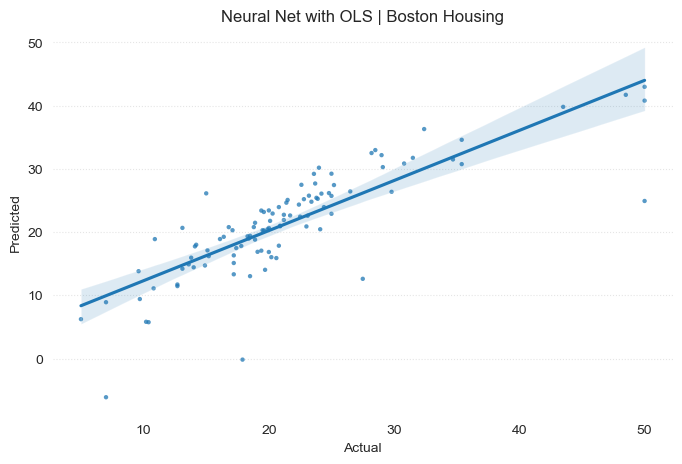

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(
    x = y_test, 
    y = y_pred, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax=ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Neural Net with OLS | Boston Housing')
plt.show()

#### 4. Loss Function

모델이 예측한 값과 실제 값 사이의 차이를 평가하기 위해 손실 함수가 사용된다. 분류 문제에서는 **교차 엔트로피(cross-entropy)** 가 자주 사용되고, 회귀 문제에서는 **평균 제곱 오차(mean squared error, MSE)** 가 주로 사용된다. 교차 엔트로피 손실 함수는 다음과 같다.

$$L(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{k} y_k \log(\hat{y_k})$$

여기서 $y_k$는 실제 클래스 label, $\hat{y_k}$는 모델이 예측한 확률값이다.

#### 5. Backpropagation

신경망 학습의 핵심은 **역전파(backpropagation)** 를 통해 가중치를 업데이트하는 것이다. 역전파는 손실 함수의 기울기를 계산하여 가중치를 업데이트하는 방법이다. 이를 위해 **체인 룰(chain rule)** 을 사용한다. 손실 함수에 대한 가중치의 편미분은 다음과 같다.

$$\frac{\partial L}{\partial W_{ji}} = \frac{\partial L}{\partial y_k} \cdot \frac{\partial y_k}{\partial h_j} \cdot \frac{\partial h_j}{\partial W_{ji}}$$

이를 통해 가중치가 경사 하강법(gradient descent)을 사용해 업데이트된다

$$W_{ji} = W_{ji} - \eta \frac{\partial L}{\partial W_{ji}}$$

여기서 $\eta$는 학습률(learning rate)이다

In [8]:
learning_rate = 0.001
hidden_nodes = 5
epochs = 100

hidden_weights = pd.DataFrame( # calculated hidden weights
    np.random.randn(X_train.shape[1], hidden_nodes), 
    index = X_train.columns
)
hidden_bias = pd.Series(np.random.randn(hidden_nodes))

def update_weights(weights, gradients, learning_rate):
    return weights - learning_rate * gradients

for epoch in range(epochs):
    hidden_outputs_train = pd.DataFrame(X_train.values @ hidden_weights.values + hidden_bias.values, index=X_train.index)
    
    ols_input = sm.add_constant(hidden_outputs_train)
    ols_output = sm.OLS(y_train, ols_input).fit()
    y_pred_train = ols_output.predict(ols_input)
    
    error = y_train - y_pred_train
    mse = np.mean(error ** 2)
    
    # gradients
    gradients = -2 * (X_train.values.T @ (error.values.reshape(-1,1) * ols_output.params[1:].values.reshape(1,-1))) / len(y_train)
    hidden_weights = update_weights( # update weights
        hidden_weights, 
        pd.DataFrame(
            gradients, 
            index = hidden_weights.index, 
            columns = hidden_weights.columns
        ), 
        learning_rate
    )
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, MSE: {mse}")

Epoch 0, MSE: 61.92198928829462
Epoch 10, MSE: 55.15580386169751
Epoch 20, MSE: 48.526866255672715
Epoch 30, MSE: 44.34592928478513
Epoch 40, MSE: 41.98824502800688
Epoch 50, MSE: 40.643331182390256
Epoch 60, MSE: 39.81275179071788
Epoch 70, MSE: 39.23463085103637
Epoch 80, MSE: 38.77961422744357
Epoch 90, MSE: 38.38402993228328


In [9]:
hidden_outputs_test = pd.DataFrame(
    X_test.values @ hidden_weights.values + hidden_bias.values, 
    index = X_test.index
)
y_pred_test = ols_output.predict(
    sm.add_constant(hidden_outputs_test)
)

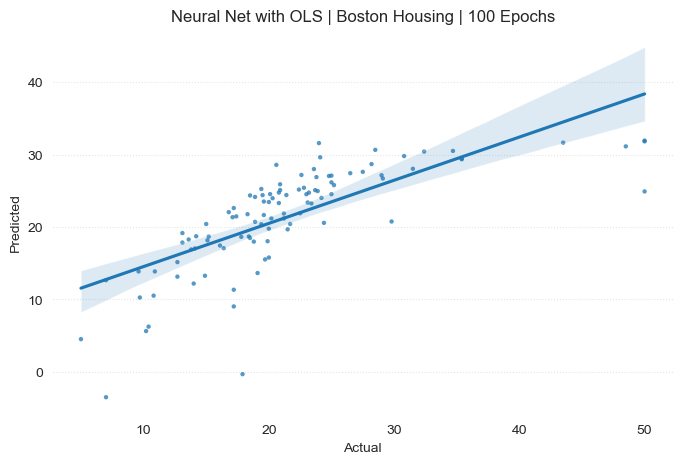

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(
    x = y_test, 
    y = y_pred_test, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax=ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Neural Net with OLS | Boston Housing | 100 Epochs')
plt.show()

In [11]:
test_mse = np.mean((y_test - y_pred_test) ** 2)
print(f"Test MSE: {test_mse}")

Test MSE: 33.839686599893135


### Model Comparison

Gaussian Model, OLS, GLS를 비교하여 보자.

In [13]:
from statsmodels.genmod.families import Gaussian
from statsmodels.genmod.families.links import Identity
from sklearn.metrics import mean_squared_error, r2_score

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

ols_model = sm.OLS(y_train, X_train_sm).fit()
y_pred_ols = ols_model.predict(X_test_sm)

glm_model = sm.GLM(y_train, X_train_sm, family = Gaussian(link = Identity())).fit()
y_pred_glm = glm_model.predict(X_test_sm)

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.random.seed(42)
W1 = np.random.randn(X_train.shape[1], 5) * 0.01 
b1 = np.random.randn(5) * 0.01 
H_train = sigmoid(X_train.values @ W1 + b1)
H_test = sigmoid(X_test.values @ W1 + b1)

H_train_sm = sm.add_constant(H_train)
H_test_sm = sm.add_constant(H_test)
output_model = sm.OLS(y_train, H_train_sm).fit()
y_pred_nn = output_model.predict(H_test_sm)

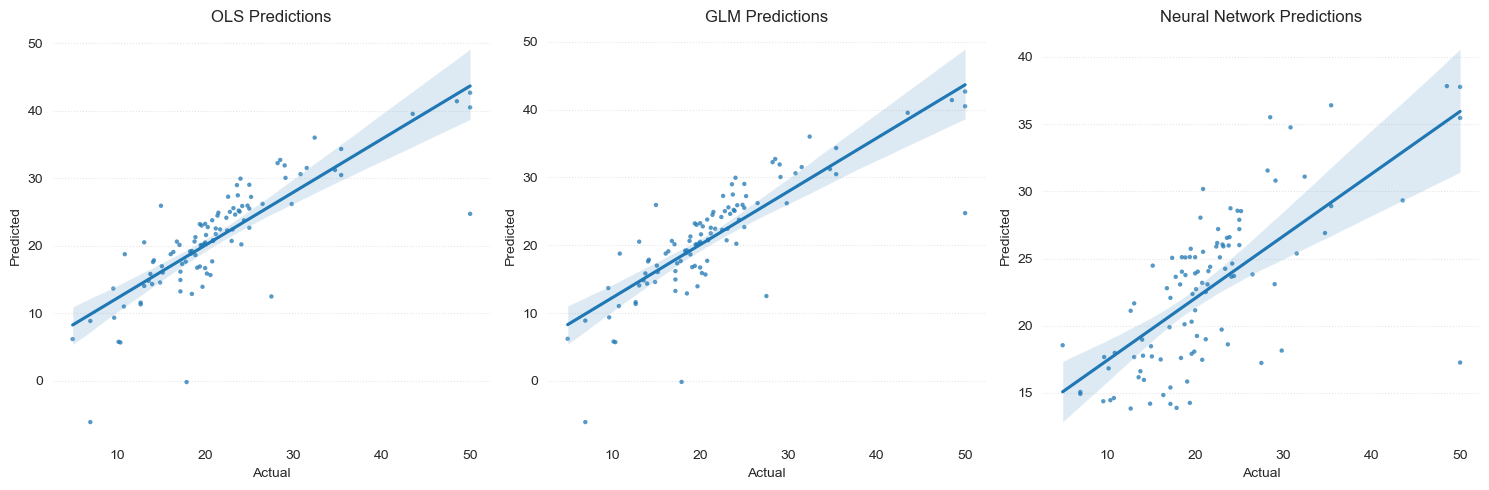

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(
    x = y_test, 
    y = y_pred_ols, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax = ax1
)
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.grid(False)
ax1.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')

ax1.set_title('OLS Predictions')

sns.regplot(
    x = y_test, 
    y = y_pred_glm, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax = ax2
)
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.grid(False)
ax2.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('GLM Predictions')

sns.regplot(
    x = y_test, 
    y = y_pred_nn, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax = ax3
)
for spine in ax3.spines.values():
    spine.set_visible(False)
ax3.grid(False)
ax3.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')
ax3.set_title('Neural Network Predictions')

plt.tight_layout()
plt.show()

In [16]:
models = {
    'OLS': y_pred_ols,
    'GLM': y_pred_glm,
    'Neural Network': y_pred_nn
}

for name, predictions in models.items():
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

OLS - MSE: 24.2911, R2: 0.6688
GLM - MSE: 24.2911, R2: 0.6688
Neural Network - MSE: 39.5660, R2: 0.4605


In [17]:
print("OLS Summary:")
print(ols_model.summary())

OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          6.21e-109
Time:                        00:43:18   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2468      5.677      5

In [18]:
print("GLM Summary:")
print(glm_model.summary())

GLM Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   MEDV   No. Observations:                  404
Model:                            GLM   Df Residuals:                      390
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                          22.418
Method:                          IRLS   Log-Likelihood:                -1194.3
Date:                Thu, 13 Mar 2025   Deviance:                       8743.1
Time:                        00:43:24   Pearson chi2:                 8.74e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9455
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2468      5.677      5

In [19]:
print("Neural Network Output Layer Summary:")
print(output_model.summary())

Neural Network Output Layer Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     36.08
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.86e-30
Time:                        00:43:31   Log-Likelihood:                -1399.6
No. Observations:                 404   AIC:                             2811.
Df Residuals:                     398   BIC:                             2835.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -7

In [20]:
for i in range(5):
    correlation = np.corrcoef(X_train.values @ W1[:, i], H_train[:, i])[0, 1]
    print(f"Hidden Neuron {i+1} correlation with its input: {correlation:.4f}")

Hidden Neuron 1 correlation with its input: 0.9577
Hidden Neuron 2 correlation with its input: 0.8637
Hidden Neuron 3 correlation with its input: 0.8565
Hidden Neuron 4 correlation with its input: 0.9785
Hidden Neuron 5 correlation with its input: 0.7973


### Scikit-Learn Multi Layer Perceptron

In [21]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(
    hidden_layer_sizes = (10, 5), 
    max_iter = 100, 
    random_state = 42
)
mlp_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=100, random_state=42)

In [22]:
y_pred_mlp = mlp_model.predict(X_test)

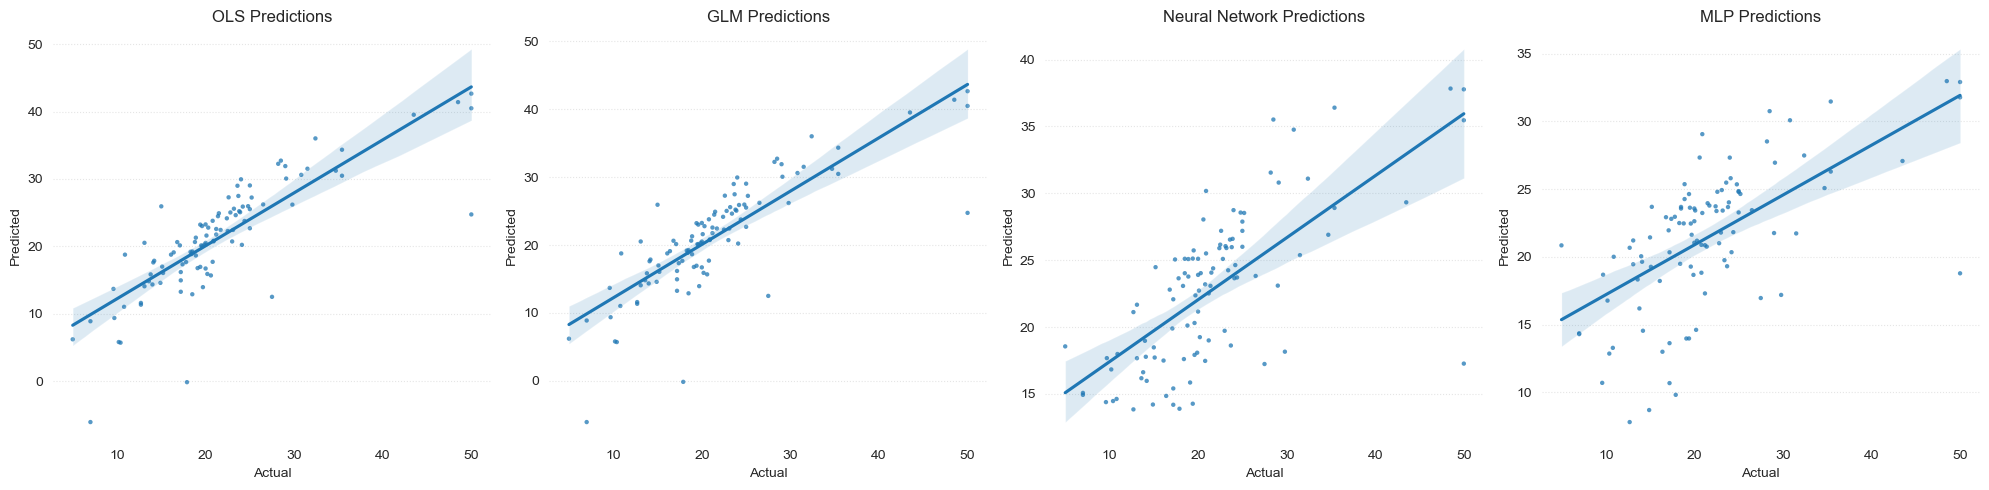

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))


sns.regplot(
    x = y_test, 
    y = y_pred_ols, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax = ax1
)
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.grid(False)
ax1.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')

ax1.set_title('OLS Predictions')

sns.regplot(
    x = y_test, 
    y = y_pred_glm, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax = ax2
)
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.grid(False)
ax2.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('GLM Predictions')

sns.regplot(
    x = y_test, 
    y = y_pred_nn, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax = ax3
)
for spine in ax3.spines.values():
    spine.set_visible(False)
ax3.grid(False)
ax3.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')
ax3.set_title('Neural Network Predictions')

sns.regplot(
    x = y_test, 
    y = y_pred_mlp, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax = ax4
)
for spine in ax4.spines.values():
    spine.set_visible(False)
ax4.grid(False)
ax4.yaxis.grid(True, ls = ':', alpha = 0.5) 
ax4.set_xlabel('Actual')
ax4.set_ylabel('Predicted')
ax4.set_title('MLP Predictions')

plt.tight_layout()
plt.show()